In [1]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

In [2]:
train_data = pd.read_csv("E:\Echo Dynamic\EchoNet-Dynamic\FileList.csv")

In [3]:
train_data

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL
...,...,...,...,...,...,...,...,...,...
10025,0X234005774F4CB5CD,51.724743,47.065329,97.493690,768,1040,50,127,TRAIN
10026,0X2DC68261CBCC04AE,62.187781,26.333478,69.642772,768,1024,50,66,TRAIN
10027,0X35291BE9AB90FB89,62.070762,49.064338,129.357561,768,1024,50,208,TRAIN
10028,0X6C435C1B417FDE8A,59.635257,57.721170,142.998978,768,1024,50,166,TRAIN


In [4]:
train_data = train_data[train_data.columns[0:2]]


In [5]:
train_4CH_dir = "E:\\Echo Dynamic\\EchoNet-Dynamic\\Videos_test\\"

In [6]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=50, resize=(112, 112)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [7]:
import glob as gb

videos = []
label = []

for folder in  os.listdir(train_4CH_dir) : 
    #files = gb.glob(pathname= str( train_4CH_dir+ '/*.avi'))
    print(folder)
    videos.append(folder)
    label.append(train_data[train_data["FileName"]==folder.split(".")[0]])
    

0X1A05DFFFCAFB253B.avi
0X1A0A263B22CCD966.avi
0X1A2A76BDB5B98BED.avi
0X1A2C60147AF9FDAE.avi
0X1A2E9496910EFF5B.avi
0X1A3D565B371DC573.avi
0X1A3E7BF1DFB132FB.avi
0X1A5FAE3F9D37794E.avi
0X1A6ACFE7B286DAFC.avi
0X1A8D85542DBE8204.avi


In [8]:
d = np.array(label)

In [9]:
xtrain = []
ytrain = []
for i in range(10):
    xtrain.append(load_video(train_4CH_dir+videos[i]))
    #for j in range(xtrain[i].shape[0]):
    ytrain.append(d[i][0][1])    
        # appending the image to the train_image list


In [10]:
ytrain

[65.14360079999999,
 65.4545286,
 65.42513582,
 64.17785605,
 56.54909473,
 58.83346066,
 65.75056397,
 53.51590769,
 51.82126873,
 58.21378021]

In [11]:
X = np.array(xtrain)
Y = np.array(ytrain)

In [12]:
print(len(X))
print(len(Y))

10
10


In [13]:
X.shape

(10, 50, 112, 112, 3)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [15]:
#X_train = base_model.predict(image)
X_train.shape

(8, 50, 112, 112, 3)

In [16]:
#X_train = base_model.predict(image)
y_train.shape

(8,)

In [17]:
X_test.shape

(2, 50, 112, 112, 3)

In [18]:
y_test.shape

(2,)

In [19]:
"""
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
        input_shape=(50,112, 112, 3) # 5 images... #CNN_LSTM
    )
)
model.add(
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.GlobalAveragePooling2D() # Or Flatten()
    )
)
model.add(
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False)
)
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile('adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
"""

"\nimport tensorflow as tf\nmodel = tf.keras.models.Sequential()\nmodel.add(\n    tf.keras.layers.TimeDistributed(\n        tf.keras.layers.Conv2D(32, (3,3), activation='relu'), \n        input_shape=(50,112, 112, 3) # 5 images... #CNN_LSTM\n    )\n)\nmodel.add(\n    tf.keras.layers.TimeDistributed(\n        tf.keras.layers.GlobalAveragePooling2D() # Or Flatten()\n    )\n)\nmodel.add(\n    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False)\n)\nmodel.add(tf.keras.layers.Dense(1, activation='linear'))\nmodel.compile('adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])\n"

In [20]:
import tensorflow 
from tensorflow.keras.layers import  Dense, LSTM


model = tf.keras.models.Sequential()
input_shape=(50,112, 112, 3)

cnn = tensorflow.keras.applications.DenseNet169(include_top=True, weights=None, input_tensor=None, input_shape=(112, 112, 3), pooling=None, classes=1)
# define LSTM model
model.add(tensorflow.keras.layers.TimeDistributed(cnn, input_shape=input_shape))
model.add(LSTM(units = 512, dropout=0.5, recurrent_dropout=0.3, return_sequences = True, input_shape = input_shape))
model.add(LSTM(units = 512, dropout=0.5, recurrent_dropout=0.3, return_sequences = False))
model.add(Dense(units=1, activation='sigmoid'))#Compile



In [21]:
from tensorflow.keras import backend as K
def dice_coef(y_true, y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2. * intersection + 0.0001) / (K.sum(y_true_f) + K.sum(y_pred_f) + 0.0001)

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

In [23]:
!pip install tensorflow_addons

In [24]:
import tensorflow_addons as tfa

In [27]:
step = tf.Variable(0, trainable=False)

schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
    [10000, 15000], [1e-0, 1e-1, 1e-2])
# lr and wd can be a function or a tensor
lr = 1e-1 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

# ...

optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

In [28]:
model.compile(loss=[dice_coef_loss],optimizer=optimizer,metrics=[dice_coef])


In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 50, 1)            12644545  
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 50, 512)           1052672   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 15,796,930
Trainable params: 15,638,530
Non-trainable params: 158,400
_________________________________________________________________
None


In [ ]:
#X_train = X_train.reshape(8,1,112,112,3)


In [ ]:
#y_train.shape

In [ ]:
#y_train = y_train.reshape(8,1)

batch_size = 50
num_epoch = 20
#steps = len(os.listdir(train_4CH_dir))//batch_size
history = model.fit(X_train,y_train, epochs=num_epoch, batch_size=batch_size,
                            verbose=1)

In [30]:
batch_size = 1
num_epoch = 2
#steps = len(os.listdir(train_4CH_dir))//batch_size
history = model.fit(X_train,y_train, epochs=num_epoch, batch_size=batch_size,
                            verbose=1)

Epoch 1/2
8/8 [==============================] - 340s 37s/step - loss: -0.8442 - dice_coef: 1.8442
Epoch 2/2
8/8 [==============================] - 307s 38s/step - loss: -0.9675 - dice_coef: 1.9675


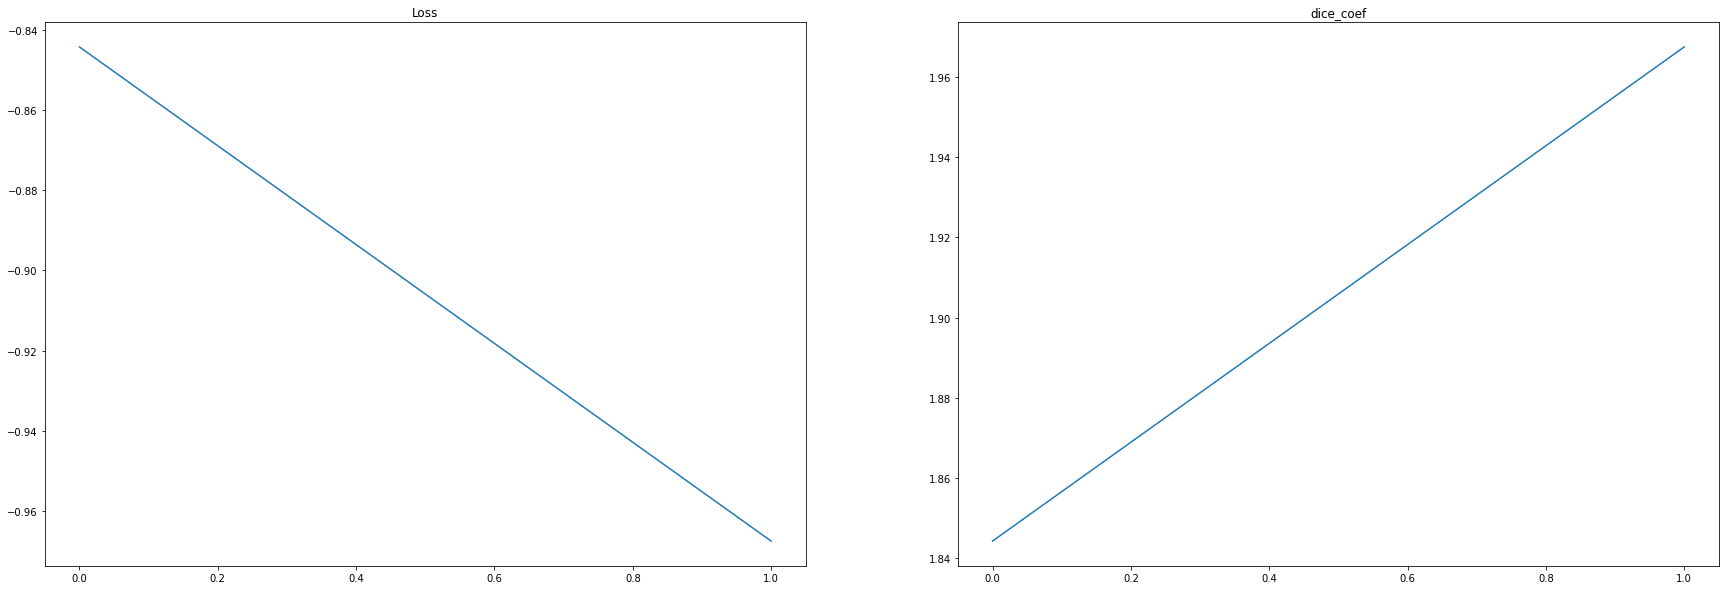

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)
ax1.plot(history.history["loss"])
ax1.set_title("Loss")
ax2.plot(history.history["dice_coef"])
ax2.set_title("dice_coef")
plt.show()

In [ ]:
#X_test = X_test.reshape(2,1,112,112,3)
#y_test = y_test.reshape(2,1)

In [33]:
y_pred = model.predict(X_test)

In [39]:
y_pred[0]

array([1.], dtype=float32)

In [35]:
y_test[0]

51.82126873

In [36]:
print("Prediction Values ")
print(y_pred)
print("*****************")
print("Real Values ")
print(y_test)

Prediction Values 
[[1.]
 [1.]]
*****************
Real Values 
[51.82126873 65.4545286 ]


In [ ]:
if (y_pred[0] >= 55 and y_pred[0] <= 70):
    plt.imshow(X_test[0])
    plt.title("Normal")
    plt.show()
elif (y_pred[0] >= 40 and y_pred[0] <= 54):
    plt.imshow(X_test[0])
    plt.title("Slightly below normal")
    plt.show()
elif (y_pred[0] >= 35 and y_pred[0] <= 39):
    plt.imshow(X_test[0])
    plt.title("Moderately below normal")
    plt.show()
    
elif (y_pred[0] < 35 ):
    plt.imshow(X_test[0])
    plt.title("Severely below normal")
    plt.show()
    